In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import nengo
from nengo.dists import Choice
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot


In [2]:
def input_one_hot(t):
    if(t % 1 == 0):
        if(t % 2 == 0):
            return 1
        else:
            return 0
    else:
        return 0

<Probe of 'output' of <Node (unlabeled) at 0x7f80510c02e8>>


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

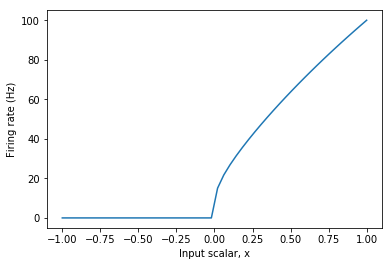

In [5]:
model = nengo.Network()
with model:
    input_node = nengo.Node(output=input_one_hot)
    
    ens_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100], intercepts=[0])
    ens_neuron.encoders = Choice([[1]])
    
    nengo.Connection(input_node, ens_neuron)
    
    input_p = nengo.Probe(input_node)
    spike_p = nengo.Probe(ens_neuron.neurons)
with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(ens_neuron, sim)

plt.figure()
plt.plot(eval_points, activities)
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");

In [6]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

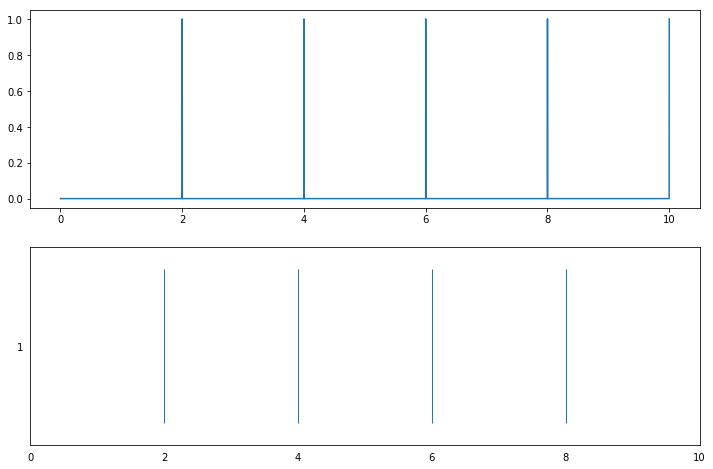

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_p])
plt.subplot(2, 1, 2)
rasterplot(sim.trange(), sim.data[spike_p])


In [6]:
plt.figure(figsize=(12, 4))
rasterplot(sim.trange(), sim.data[spike])

NameError: name 'spike' is not defined

<Figure size 864x288 with 0 Axes>